DAVID ALEJANDRO VALDEZ CABALLERO  
A00841426  
HERRAMIENTAS COMPUTACIONALES: EL ARTE DE LA ANALITICA DE DATOS  
Actividad Evaluable: Mapas de calor y boxplots  
19 de septiembre 2025

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Pregnancies Qué es: Número de embarazos. Tipo: Cuantitativa discreta (porque se cuenta en números enteros).

Glucose Qué es: Concentración de glucosa en sangre tras 2 horas de una prueba oral de tolerancia a la glucosa. Tipo: Cuantitativa continua (valor medido en una escala).

BloodPressure Qué es: Presión arterial diastólica (mm Hg). Tipo: Cuantitativa continua.

SkinThickness Qué es: Espesor del pliegue cutáneo del tríceps (mm). Tipo: Cuantitativa continua (aunque algunos lo consideran discreta, en realidad se mide en una escala).

Insulin Qué es: Concentración sérica de insulina en sangre (mu U/ml). Tipo: Cuantitativa continua.

BMI (Body Mass Index) Qué es: Índice de masa corporal (peso/altura²). Tipo: Cuantitativa continua.

DiabetesPedigreeFunction Qué es: Función de pedigrí de diabetes (mide riesgo hereditario de diabetes). Tipo: Cuantitativa continua (es un índice calculado).

Age Qué es: Edad del paciente. Tipo: Cuantitativa discreta (se registra en años, no fracciones).

Outcome Qué es: Resultado diagnóstico (0 = no diabético, 1 = diabético). Tipo: Categórica nominal dicotómica.

In [9]:
Diabetes = pd.read_csv("diabetes.csv")

In [14]:
Diabetes.shape

(768, 9)

Usa función shape para revisar el total de renglones y columnas

In [15]:
Diabetes.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,32.0,0.232,54,1


In [16]:
Diabetes.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


Revisa los últimos 5 renglones del dataset usando la función tail()

In [17]:
Diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Revisa la información mas completa del conjunto de datos usando la función info(); muestra el total de datos, las columnas y su tipo correspondiente, dice si contiene nulos o no

In [18]:
Diabetes.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         247
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

Revisa cuántos valores únicos tiene cada atributo del archivo usando la función nunique()

In [19]:
Diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,32.450911,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,6.875366,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Utiliza la función describe() para obtener estadística básica. se puede incluir -0

In [20]:
Diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Revisa Valores nulos con funcion isnull().sum()

In [21]:
mean_age = Diabetes['Age'].mean()
median_age =Diabetes['Age'].median()
mode_age = Diabetes['Age'].mode()
print("Mean_age:",mean_age)
print("Median_age:",median_age)
print("Mode_age:",mode_age)

Mean_age: 33.240885416666664
Median_age: 29.0
Mode_age: 0    22
Name: Age, dtype: int64


Basado en la Edad, se puede obtener la media, mediana y moda.

In [22]:
Diabetes.Age.value_counts()

Age
22    72
21    63
25    48
24    46
23    38
28    35
26    33
27    32
29    29
31    24
41    22
30    21
37    19
42    18
33    17
36    16
38    16
32    16
45    15
34    14
46    13
40    13
43    13
39    12
35    10
44     8
50     8
51     8
52     8
58     7
54     6
47     6
49     5
60     5
53     5
57     5
48     5
63     4
66     4
55     4
62     4
59     3
56     3
65     3
67     3
61     2
69     2
72     1
81     1
64     1
70     1
68     1
Name: count, dtype: int64

Cuenta la cantidad de personas con edades específicas.

In [27]:
num_cols = Diabetes.select_dtypes(include='number').columns.tolist()

#  Estadísticos básicos para un ejemplo (Glucose); puedes cambiar por cualquier columna
print(f"Mediana ({col_ejemplo}):", Diabetes[col_ejemplo].median(skipna=True))
print(f"Media   ({col_ejemplo}):", Diabetes[col_ejemplo].mean(skipna=True))
print("dtype:", Diabetes[col_ejemplo].dtype)


Mediana (Glucose): 117.0
Media   (Glucose): 121.65625
dtype: float64


La mediana de todos los datos de valores de glucosa es de 117
La media/promedio de todos los valores de la glucosa es de 121.65625

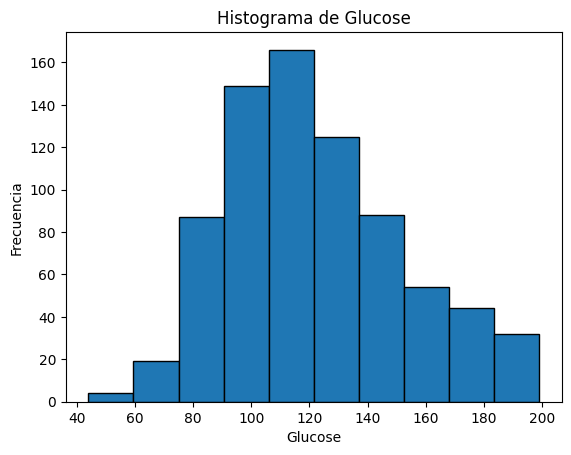

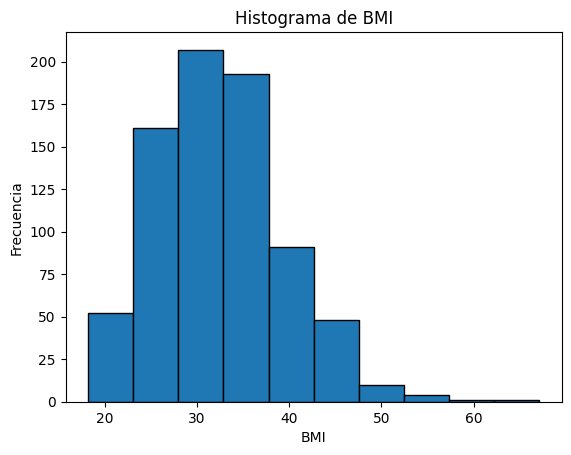

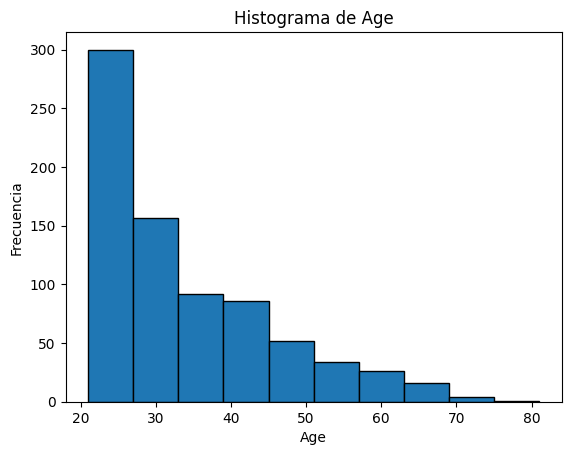

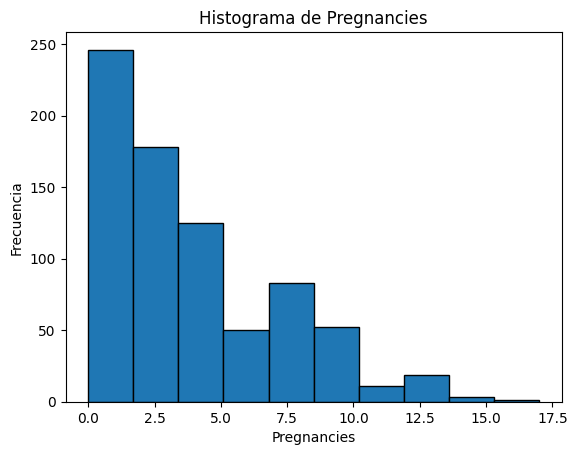

In [46]:
# Seleccionar columnas numéricas de interés en el dataset Diabetes
num_cols = ['Glucose', 'BMI', 'Age', 'Pregnancies']
num_cols = [c for c in num_cols if c in Diabetes.columns]  # por seguridad

# Crear histogramas
for col in num_cols:
    plt.hist(Diabetes[col].dropna(), bins=10, edgecolor='black')
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()


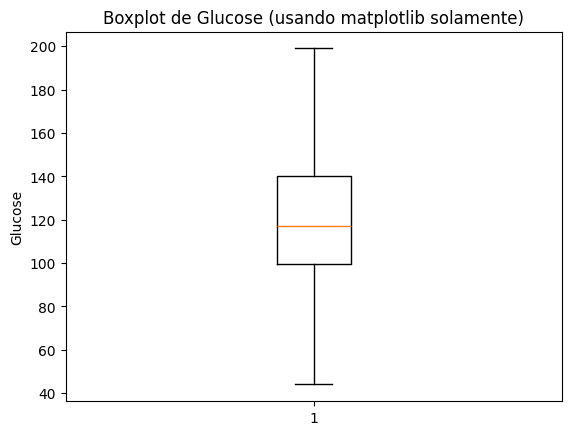

In [45]:
# Boxplot simple (columna ejemplo) - matplotlib
plt.boxplot(Diabetes[col_ejemplo])
plt.title(f'Boxplot de {col_ejemplo} (usando matplotlib solamente)')
plt.ylabel(col_ejemplo)
plt.show()

En este boxplot de Glucose, podemos ver que la mayoría de las personas se concentran en un rango entre unos 100 y 140, con una mediana cercana a 118. También hay valores más bajos, cerca de 45, y más altos, hasta alrededor de 200, lo que indica que en el grupo hay personas con niveles de glucosa muy distintos.

La diferencia está en la librería usada: con matplotlib el gráfico es más básico, mostrando únicamente la caja, los bigotes y la línea de la mediana, mientras que con seaborn el mismo boxplot se presenta de forma más estilizada y moderna, además de que ofrece más opciones para superponer otros elementos. En otras palabras, ambos muestran lo mismo, pero seaborn facilita una visualización más clara y atractiva, mientras que matplotlib ofrece la versión más simple y directa, con menos detalles a disposición.

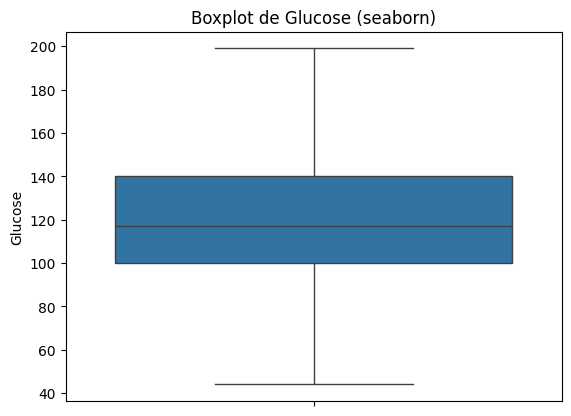

El 25% de las personas tienen Glucose debajo de 99.75
El 25% de las personas tienen Glucose arriba de 140.25


In [29]:
# 7) Boxplot simple (columna ejemplo) - seaborn
sns.boxplot(y=Diabetes[col_ejemplo])
plt.title(f'Boxplot de {col_ejemplo} (seaborn)')
plt.ylabel(col_ejemplo)
plt.show()

# 8) Percentiles para la columna ejemplo
q1, mediana, q3 = np.percentile(Diabetes[col_ejemplo], [25, 50, 75])
print(f"El 25% de las personas tienen {col_ejemplo} debajo de", q1)
print(f"El 25% de las personas tienen {col_ejemplo} arriba de", q3)

La gráfica nos muestra que la mayoría de las personas tienen sus valores de glucosa entre unos 100 y 140, con un punto medio cercano a 118. Esto quiere decir que la mitad de los pacientes tiene valores por debajo y la otra mitad por encima de esa cifra. También se alcanzan casos más bajos (alrededor de 45) y más altos (cerca de 200), lo que indica que hay personas con niveles muy distintos de glucosa dentro del grupo. En resumen, la mayoría se concentra en un rango medio, pero también hay algunos con valores muy bajos o muy altos que llaman la atención.

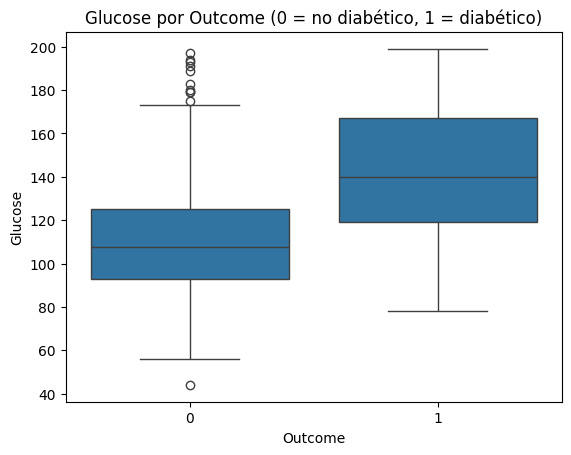

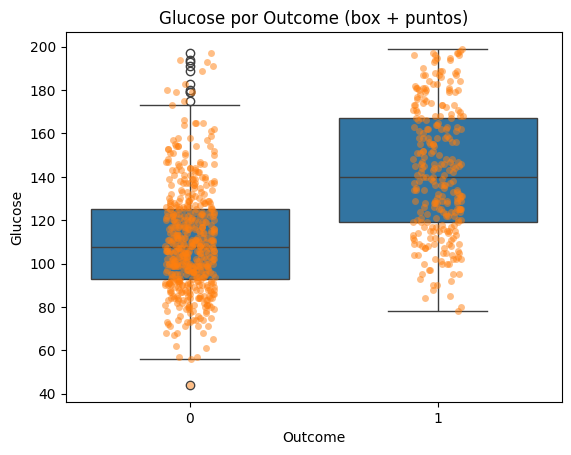

In [36]:
# 9) Boxplot por Outcome 
if 'Outcome' in Diabetes.columns:
    # seaborn recomienda pasar DataFrame + x/y como strings
    sns.boxplot(data=Diabetes, x='Outcome', y=col_ejemplo)
    plt.title(f'{col_ejemplo} por Outcome (0 = no diabético, 1 = diabético)')
    plt.xlabel('Outcome')
    plt.ylabel(col_ejemplo)
    plt.show()

    # Stripplot superpuesto para ver dispersión
    ax = sns.boxplot(data=Diabetes, x='Outcome', y=col_ejemplo)
    sns.stripplot(data=Diabetes, x='Outcome', y=col_ejemplo, ax=ax, edgecolor='auto', alpha=0.5)
    plt.title(f'{col_ejemplo} por Outcome (box + puntos)')
    plt.xlabel('Outcome')
    plt.ylabel(col_ejemplo)
    plt.show()

Este gráfico compara los niveles de glucosa entre dos grupos: personas no diabéticas (Outcome=0) y personas diabéticas (Outcome=1).
En los no diabéticos, la mediana de glucosa está alrededor de 105 y la mayoría de los valores se concentran entre 90 y 125.
En los diabéticos, la mediana es más alta, cercana a 140, y el rango típico se encuentra entre 120 y 165.
Esto indica lógicamente que las personas diagnosticadas con diabetes tienden a tener niveles de glucosa más altos que quienes no la tienen.

Además, se observan outliers (valores atípicos) en el grupo de no diabéticos: aparecen como puntos individuales por encima de 170 y también uno por debajo de 50.
Los outliers son datos que se alejan mucho del patrón general; en los boxplots se representan como círculos fuera de los “bigotes” (las líneas que marcan los valores esperados según la distribución). Estos valores pueden deberse a casos poco comunes, errores de medición o situaciones excepcionales, pero son importantes porque pueden influir en el análisis si no se interpretan con cuidado.

In [33]:
# 10) Matriz de correlación (solo numéricas)
variables_numericas = Diabetes.select_dtypes(include='number')
matriz_correlacion = variables_numericas.corr().round(2)
print("Matriz de correlación:\n", matriz_correlacion, "\n")

Matriz de correlación:
                           Pregnancies  Glucose  BloodPressure  SkinThickness  \
Pregnancies                      1.00     0.13           0.21           0.08   
Glucose                          0.13     1.00           0.22           0.19   
BloodPressure                    0.21     0.22           1.00           0.19   
SkinThickness                    0.08     0.19           0.19           1.00   
Insulin                          0.03     0.42           0.05           0.16   
BMI                              0.02     0.23           0.28           0.54   
DiabetesPedigreeFunction        -0.03     0.14          -0.00           0.10   
Age                              0.54     0.27           0.32           0.13   
Outcome                          0.22     0.49           0.17           0.21   

                          Insulin   BMI  DiabetesPedigreeFunction   Age  \
Pregnancies                  0.03  0.02                     -0.03  0.54   
Glucose                  

La matriz de correlación que muestras refleja cómo se relacionan las variables numéricas del dataset de diabetes entre sí y con la variable Outcome (si la persona es diabética o no). En mi perspectiva, los datos son mucho más difíciles de interpretar en esta matriz, por lo tanto usaré el heatmap de correlación para dar una xplicación más a profundidad de la correlación encontrada.

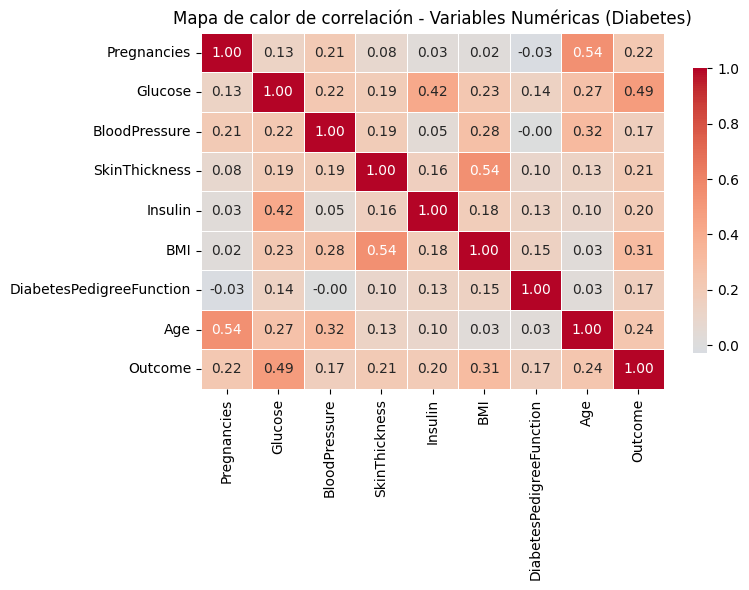

In [34]:
# 11) Heatmap de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', center=0,
            fmt=".2f", linewidths=.5, cbar_kws={"shrink": .8})
plt.title('Mapa de calor de correlación - Variables Numéricas (Diabetes)')
plt.tight_layout()
plt.show()


Glucose es la que más se relaciona con ser diabético (Outcome = 0.49), lo que tiene sentido porque un nivel alto de glucosa es un indicador directo de la enfermedad.

BMI (índice de masa corporal) también muestra cierta relación positiva con Outcome (0.31), lo que sugiere que las personas con más peso corporal tienen mayor probabilidad de ser diabéticas.

Age (0.24) y Pregnancies (0.22) también tienen relación, indicando que la edad y el número de embarazos pueden influir en la probabilidad de diabetes.

BloodPressure, SkinThicknesrs e Insulin tienen correlaciones más bajas con Outcome, lo que significa que no explican tanto la presencia de la enfermedad por sí solos.

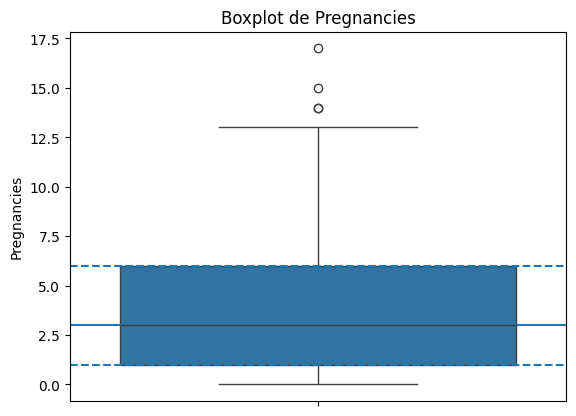

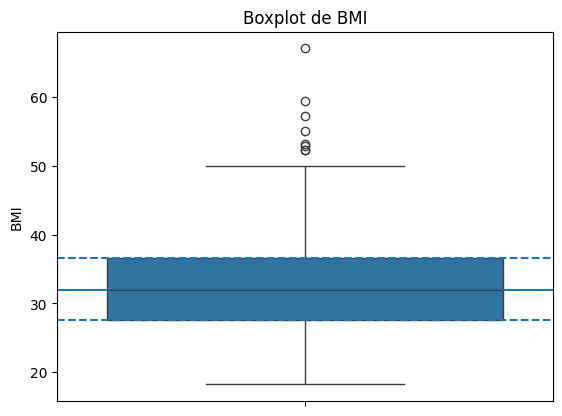

In [42]:
Diabetes['BMI'] = Diabetes['BMI'].replace(0, np.nan).fillna(Diabetes['BMI'].median())

# Variables de interés
vars_interes = ['Pregnancies', 'BMI']

# Boxplots simples + quartiles + descripción
for col in vars_interes:
    serie = Diabetes[col].dropna()
    q1, q2, q3 = np.percentile(serie, [25, 50, 75])
    vmin, vmax = float(serie.min()), float(serie.max())
    media = float(serie.mean())
    
    ax = sns.boxplot(y=serie)
    # Marcar quartiles en el eje Y
    plt.axhline(q1, linestyle='--')
    plt.axhline(q2, linestyle='-')
    plt.axhline(q3, linestyle='--')
    plt.title(f'Boxplot de {col}')
    plt.ylabel(col)
    plt.show()

Pregnancies:

La mayoría de las mujeres tienen entre 1 y 6 embarazos (la caja central).
La mediana está alrededor de 3, lo que significa que la mitad de las mujeres tuvo 3 o menos embarazos.
Aparecen varios outliers arriba de 13 embarazos, casos poco comunes dentro del grupo.

BMI:

La mayoría de los valores se concentran entre 28 y 37.
La mediana está cerca de 32, indicando que la mitad de las personas tiene un BMI mayor a ese valor.
Se observan outliers hacia arriba, con valores que superan los 50 e incluso uno mayor a 65, lo que refleja casos de obesidad severa en comparación con el resto de la población.

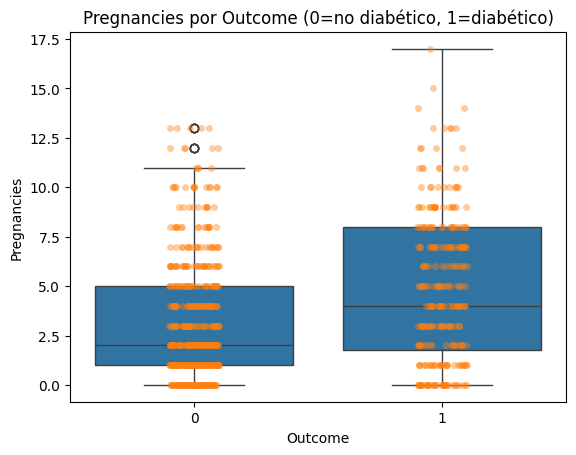

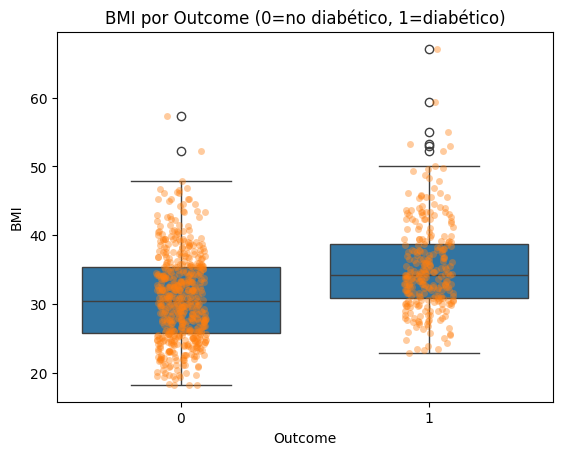

In [41]:
# =======================
# Boxplots por Outcome + stripplot + quartiles por grupo + descripción
# =======================
if 'Outcome' in Diabetes.columns:
    for col in vars_interes:
        ax = sns.boxplot(data=Diabetes, x='Outcome', y=col)
        sns.stripplot(data=Diabetes, x='Outcome', y=col, ax=ax, alpha=.4, edgecolor='auto')
        plt.title(f'{col} por Outcome (0=no diabético, 1=diabético)')
        plt.xlabel('Outcome')
        plt.ylabel(col)
        plt.show()

        # Tabla de quartiles por grupo
        tabla_q = (Diabetes
                   .groupby('Outcome')[col]
                   .describe(percentiles=[.25,.5,.75])[['min','25%','50%','75%','max','mean','count']]
                   .round(2))

Igual que anteriormente usar seaborn te ofrece muchos más detalles a la hora de dar datos, lo cuál lo convierte en una mejor opción.

Pregnancies:
Las mujeres diabéticas suelen tener un número mayor de embarazos en comparación con las no diabéticas. La mediana en el grupo diabético está más alta y se observa una mayor dispersión, con casos que llegan hasta más de 15 embarazos, con 17 siendo el más alto. Esto sugiere que un número más elevado de embarazos podría estar asociado con mayor riesgo de diabetes.

BMI:
El índice de masa corporal también muestra una diferencia: en el grupo diabético la mediana es más alta, y aunque ambos grupos tienen gran parte de los valores entre 28 y 35, en los diabéticos se concentran más casos en niveles elevados. Además, aparecen outliers en ambos grupos, con personas que alcanzan valores superiores a 50, lo que refleja obesidad severa.

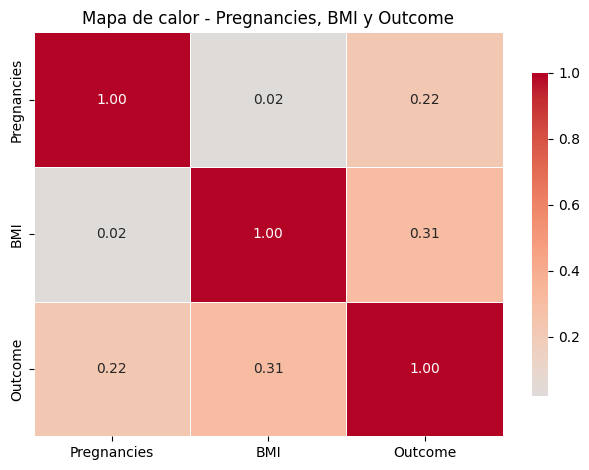

In [43]:
# heatmap de numero de embarazos, indice de masa corporal y outcome (diabeticos o no)
cols_corr = vars_interes + (['Outcome'] if 'Outcome' in Diabetes.columns else [])
corr = Diabetes[cols_corr].corr().round(2)
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt='.2f', linewidths=.5, cbar_kws={'shrink':.8})
plt.title('Mapa de calor - Pregnancies, BMI y Outcome')
plt.tight_layout()
plt.show()


La relación entre Pregnancies y Outcome es de 0.22, lo que indica una asociación positiva moderada: a mayor número de embarazos, aumenta la probabilidad de diabetes.  
La relación entre BMI y Outcome es de 0.31, más fuerte que la anterior, lo que sugiere que el índice de masa corporal es un factor más importante para diferenciar entre personas diabéticas y no diabéticas.  
La relación entre Pregnancies y BMI es muy baja (0.02), prácticamente inexistente, lo que significa que estas dos variables no están ligadas entre sí.

1. ¿Hay alguna variable que no aporta información? ¿Si tuvieras que eliminar variables, ¿cuáles quitarías y por qué?

2. Si comparas el rango de las variables (min-max), ¿todas están en rangos similares? Describe sus rangos.

3. ¿Existen variables que tengan datos atípicos? Describe cuáles si o no.

4. ¿Existe correlación alta entre variables? Describe algunas, indicando si es correlación positiva o negativa.
     

1.

Todas las variables tienen algún grado de valor, pero SkinThickness e Insulin suelen tener muchos ceros o valores faltantes poco realistas, lo que reduce su utilidad en el análisis.
Además, algunas pueden ser redundantes si están muy correlacionadas con otras (por ejemplo, BMI y SkinThickness suelen estar relacionadas con obesidad inherentemente).

2.

Pregnancies: 0 a ~17 → valores enteros, rango pequeño.
Glucose: ~40 a 200 → valores realistas para glucosa en mg/dl.
BloodPressure: ~30 a 120 → algunos valores demasiado bajos para presión arterial (posibles datos erróneos).
SkinThickness: 0 a ~100 → muchos ceros, rango amplio pero cuestionable.
Insulin: 0 a ~800 → valores muy extremos, con muchos ceros que no dan valor a la investigación.
BMI: ~18 a 65 → rango lógico, refleja bajo peso hasta obesidad severa.
DiabetesPedigreeFunction: ~0.1 a 2.5 → escala distinta, mide predisposición genética.
Age: 20 a ~80 → rango esperado para adultos.
Outcome: 0 o 1 (categórica binaria).


3.

Pregnancies: valores de más de 15 embarazos son poco comunes.
Insulin: valores de 543 o 846 son extremadamente altos → outliers claros.
BMI: algunos valores >60 también se consideran atípicos.
BloodPressure y SkinThickness: muchos ceros que no son fisiológicamente válidos → considerados atípicos o errores.

4.
Glucose ↔ Outcome = 0.49 (positiva, moderada-alta)
→ A mayor glucosa, mayor probabilidad de diabetes.

BMI ↔ Outcome = 0.31 (positiva, moderada)
→ A mayor índice de masa corporal, mayor probabilidad de diabetes.

Pregnancies ↔ Outcome = 0.22 (positiva, débil-moderada)
→ Más embarazos se asocian con mayor riesgo de diabetes.

Age ↔ Pregnancies = 0.54 (positiva, fuerte)
→ Es lógico: a mayor edad, mayor número de embarazos acumulados.

BMI ↔ SkinThickness = 0.54 (positiva, fuerte)
→ Reflejan la misma condición: acumulación de grasa corporal.

Insulin ↔ Glucose = 0.42 (positiva, moderada)
→ A mayor glucosa, también suelen aumentar los niveles de insulina.